<a href="https://colab.research.google.com/github/kesavakrishna/cybersapient/blob/main/gold_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_excel('/content/GOLD_DATA_EXCEL.xlsx')
df

,Date,Close,Open,High,Low
0,2008-01-01,113.0520,113.4020,113.6990,112.3770
1,2008-01-02,116.0200,114.2520,116.6810,114.2520
2,2008-01-03,117.2470,117.0720,117.7600,115.6280
3,2008-01-04,116.7890,116.7080,117.6120,115.6150
4,2008-01-07,116.2890,116.7210,117.0720,115.8170
...,...,...,...,...,...
3701,2022-03-09,218.5818,226.6545,227.2323,217.8391
3702,2022-03-10,219.9612,217.7383,221.4943,217.5890
3703,2022-03-11,218.2969,219.9041,219.9480,215.7610
3704,2022-03-14,215.6744,217.5508,218.0665,214.7527


In [74]:
# Convert the 'Date' column to a datetime data type
df['Date'] = pd.to_datetime(df['Date'])

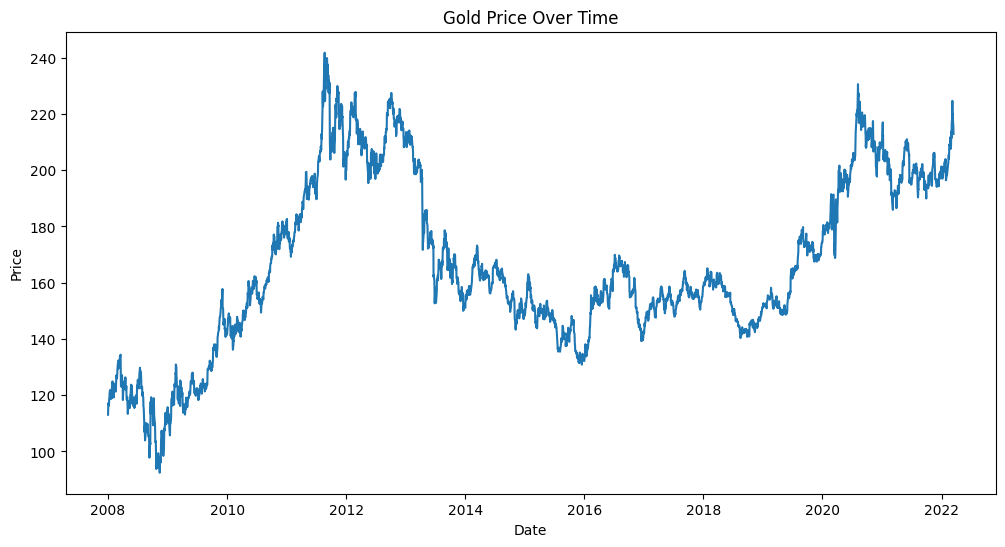

In [75]:
# Plotting Time Series Data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [77]:
# Summary Statistics
summary_stats = df['Close'].describe()
print(summary_stats)

count    3706.000000
mean      166.090737
std        30.112189
min        92.435000
25%       147.727925
50%       159.806800
75%       194.416125
max       241.734000
Name: Close, dtype: float64


 KDE plot shows the estimated probability density, while  histogram displays the frequency or count of gold prices within each bin.

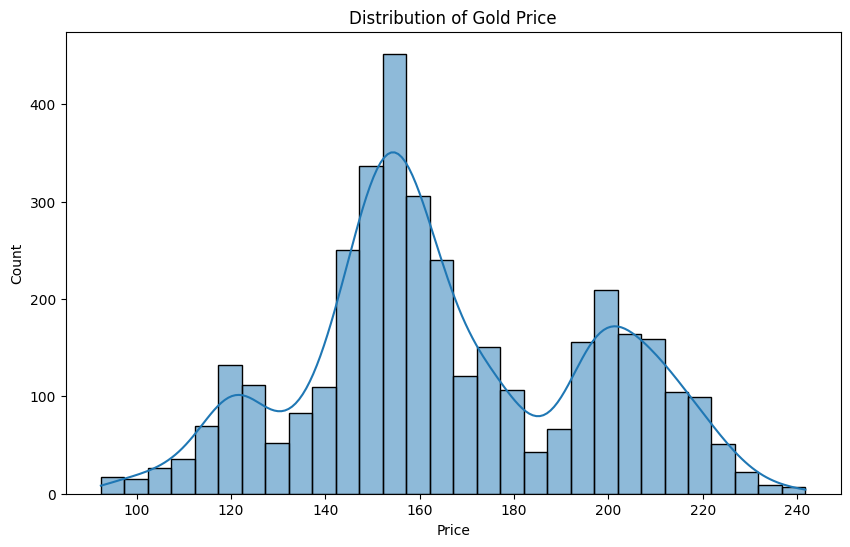

In [78]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Gold Price')
plt.xlabel('Price')
plt.show()

In [50]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(df['Close'])
# plt.title('Box Plot of Gold Price')
# plt.xlabel('Price')
# plt.show()

Autocorrelation measures the relationship between a variable and its past values at different time lags
1 then strong positive relationship
-1 then strong negative relationship
0 then no autocorrelation

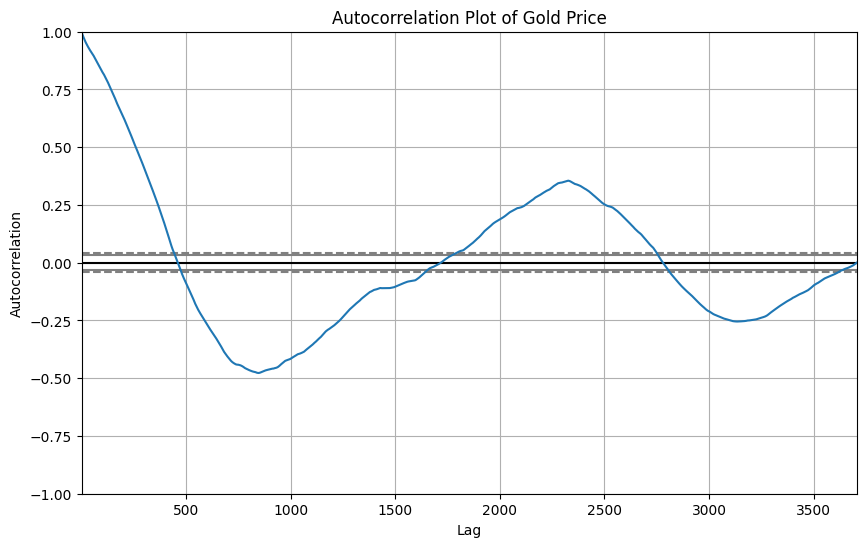

In [79]:
# Autocorrelation Plot
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot of Gold Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [80]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [81]:
# Extract the 'Close' prices as the target variable
target_variable = df['Close'].values

In [82]:
# Perform a train-test split
train_size = int(len(target_variable) * 0.8)
train_data = target_variable[:train_size]
test_data = target_variable[train_size:]

we apply MinMax scaler as LSTM are sensitive to the scale of the data

In [83]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data.reshape(-1, 1))
test_data = scaler.transform(test_data.reshape(-1, 1))


In [84]:
# Create input sequences and corresponding output values for LSTM
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)


In [85]:
sequence_length = 10  # Adjust this value based on the desired sequence length
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [86]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [87]:
# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
93/93 [==============================] - 3s 8ms/step - loss: 0.0079
Epoch 2/100
93/93 [==============================] - 1s 8ms/step - loss: 4.4743e-04
Epoch 3/100
93/93 [==============================] - 1s 8ms/step - loss: 4.3300e-04
Epoch 4/100
93/93 [==============================] - 1s 8ms/step - loss: 4.2602e-04
Epoch 5/100
93/93 [==============================] - 1s 8ms/step - loss: 4.4092e-04
Epoch 6/100
93/93 [==============================] - 1s 8ms/step - loss: 4.1123e-04
Epoch 7/100
93/93 [==============================] - 1s 8ms/step - loss: 4.0114e-04
Epoch 8/100
93/93 [==============================] - 1s 8ms/step - loss: 4.0560e-04
Epoch 9/100
93/93 [==============================] - 1s 8ms/step - loss: 3.8637e-04
Epoch 10/100
93/93 [==============================] - 1s 11ms/step - loss: 3.7170e-04
Epoch 11/100
93/93 [==============================] - 1s 12ms/step - loss: 3.6347e-04
Epoch 12/100
93/93 [==============================] - 1s 12ms/step - loss: 3

In [88]:
# Evaluate the model on the testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

23/23 [==============================] - 0s 6ms/step


In [89]:
# Inverse transform the predictions and actual values to their original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

on average, the model's predicted gold prices deviate from the actual prices by approximately 2.03 and 2.43 units for the train and test sets

In [90]:
# Calculate the root mean squared error (RMSE) for train and test predictions
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 2.03
Test RMSE: 2.43


from the graph we can see that the lstm model was able to map the actual value pretty well

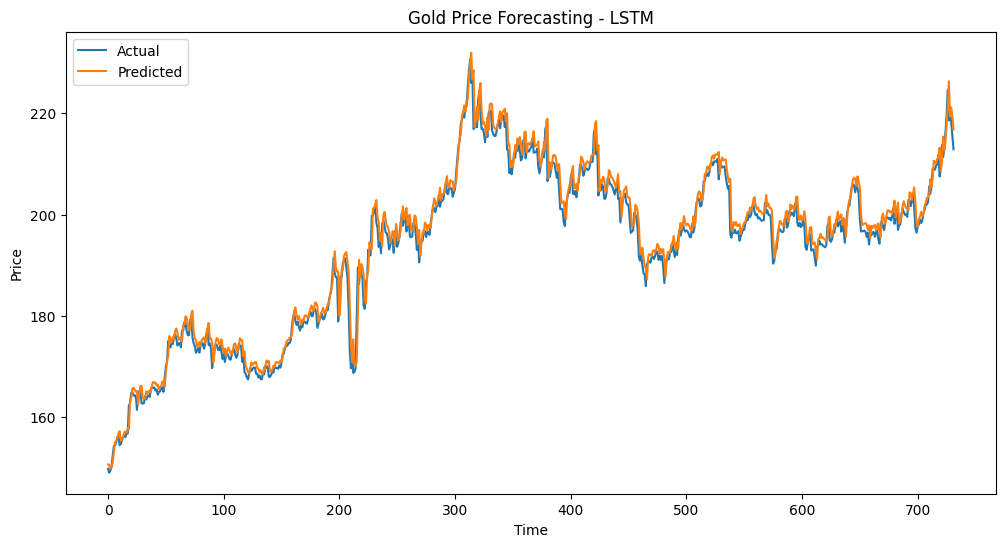

In [91]:
# Visualize the predicted values against the actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('Gold Price Forecasting - LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

high R square value indicates that the model fits the data well and can make accurate predictions.

In [93]:
# Calculate R-squared (coefficient of determination) for train and test predictions
from sklearn.metrics import mean_squared_error, r2_score
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)
print(f"Train R-squared: {train_r2:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

Train R-squared: 1.00
Test R-squared: 0.98


the concentration of dots around the [0, 0] mark suggests that the model's predicted price changes align closely with the actual price changes.

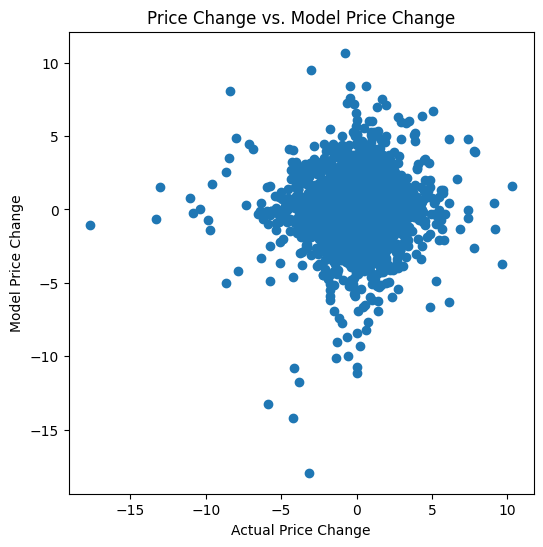

In [95]:
# Calculate the price change and model price change
price_change_actual = np.diff(target_variable)
price_change_model = np.diff(np.concatenate((train_predictions, test_predictions)).ravel())

# Ensure both arrays have the same length
price_change_actual = price_change_actual[:len(price_change_model)]

# Create scatter plot of price change vs. model price change
plt.figure(figsize=(6, 6))
plt.scatter(price_change_actual, price_change_model)
plt.title('Price Change vs. Model Price Change')
plt.xlabel('Actual Price Change')
plt.ylabel('Model Price Change')
plt.show()


In [96]:
# Calculate the residuals
train_residuals = y_train - train_predictions.flatten()
test_residuals = y_test - test_predictions.flatten()

Dots above the line indicate positive residuals, meaning the model might have overestimated the actual price change

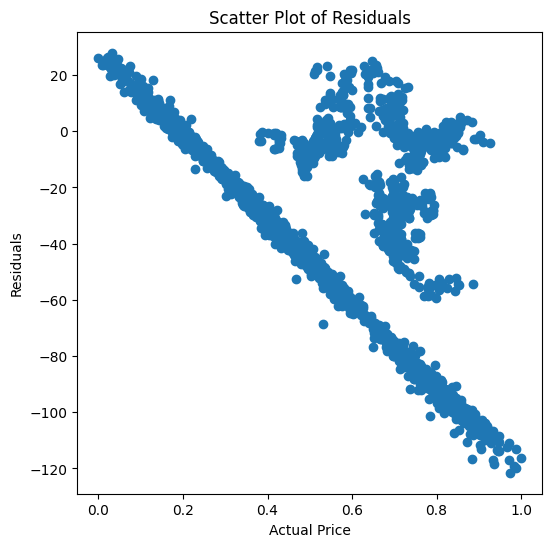

In [115]:
# Reshape the train and test residuals arrays
train_residuals = train_residuals.reshape(-1, 1)
test_residuals = test_residuals.reshape(-1, 1)

# Concatenate the train and test residuals arrays
combined_residuals = np.concatenate((train_residuals, test_residuals))

# Determine the minimum length for plotting
min_length = min(len(combined_data), len(combined_residuals))

# Create scatter plot of residuals
plt.figure(figsize=(6, 6))
plt.scatter(combined_data[:min_length].ravel(), combined_residuals[:min_length].ravel())
plt.title('Scatter Plot of Residuals')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.show()


In [122]:
len(test_data)


742

In [123]:
x_input=test_data[642:].reshape(1,-1)
x_input.shape

(1, 100)

In [124]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [125]:
temp_input


[0.7088500257871787,
 0.7116551349975554,
 0.6978499521095253,
 0.7066350076021942,
 0.7019102606179547,
 0.6830849503345636,
 0.7049370725858847,
 0.7221381255065339,
 0.7304047582368268,
 0.7324416104595476,
 0.745440357939437,
 0.757005070362159,
 0.760323243960107,
 0.7591437317061737,
 0.7499266572448576,
 0.7617981366251617,
 0.7553091447364014,
 0.7481570539655321,
 0.7148279626789195,
 0.6980167315253284,
 0.6984587974467346,
 0.6984587974467346,
 0.6993435990863973,
 0.6972056075392333,
 0.690790293304041,
 0.6965418388602737,
 0.6806147395494945,
 0.6962464584491524,
 0.6930026323016228,
 0.6968365494745444,
 0.6974266404999364,
 0.6909376486111761,
 0.6969102271281121,
 0.6994909543935325,
 0.6876931526667961,
 0.681942276907414,
 0.7067910702683876,
 0.7117314918385252,
 0.7041366653493996,
 0.6997863348046537,
 0.7097401858016464,
 0.7167455910622308,
 0.7167455910622308,
 0.7146069297182166,
 0.7161555000368388,
 0.7123945907206345,
 0.7185151943415561,
 0.729206491671076

In [126]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.8248866]
101
1 day input [0.71165513 0.69784995 0.70663501 0.70191026 0.68308495 0.70493707
 0.72213813 0.73040476 0.73244161 0.74544036 0.75700507 0.76032324
 0.75914373 0.74992666 0.76179814 0.75530914 0.74815705 0.71482796
 0.69801673 0.6984588  0.6984588  0.6993436  0.69720561 0.69079029
 0.69654184 0.68061474 0.69624646 0.69300263 0.69683655 0.69742664
 0.69093765 0.69691023 0.69949095 0.68769315 0.68194228 0.70679107
 0.71173149 0.70413667 0.69978633 0.70974019 0.71674559 0.71674559
 0.71460693 0.7161555  0.71239459 0.71851519 0.72920649 0.70819229
 0.71888358 0.72662576 0.70015472 0.70620098 0.70723314 0.72174964
 0.72823194 0.72388697 0.72027877 0.72027877 0.71726    0.73979196
 0.7393499  0.7313974  0.73883415 0.74678665 0.72985084 0.70260618
 0.69642128 0.70363767 0.70739255 0.71387216 0.7093075  0.71203156
 0.7223404  0.72683206 0.733238   0.73382742 0.73728826 0.7573902
 0.74767078 0.75893676 0.78139505 0.77977481 0.77977481 0.78537097
 0.78757996 0.79928801 0.7707915  0